# Building a compound mesh

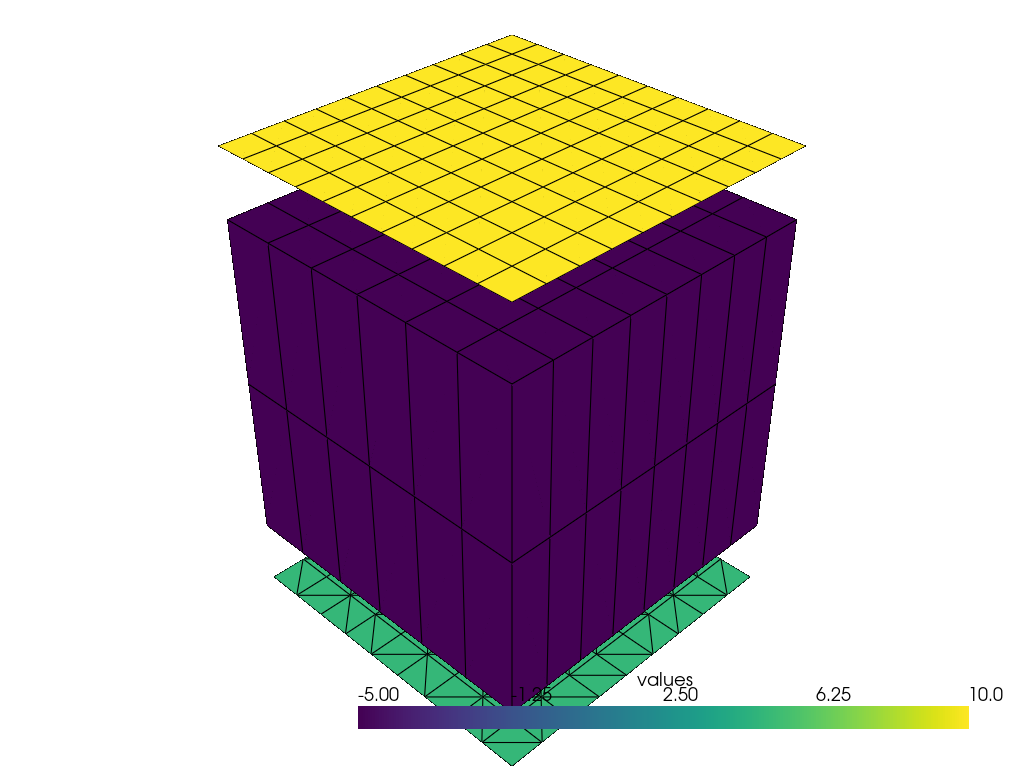

In [1]:
from sigmaepsilon.mesh import PolyData
from sigmaepsilon.mesh.trimesh import TriMesh
from sigmaepsilon.mesh.grid import Grid
from sigmaepsilon.mesh.space import StandardFrame
import numpy as np

A = StandardFrame(dim=3)
tri = TriMesh(size=(100, 100), shape=(10, 10), frame=A)
grid2d = Grid(size=(100, 100), shape=(10, 10), eshape="Q4", frame=A)
grid3d = Grid(size=(100, 100, 100), shape=(8, 6, 2), eshape="H8", frame=A)

mesh = PolyData(frame=A)
mesh["tri", "T3"] = tri.move(np.array([0.0, 0.0, -20]))
mesh["grids", "Q4"] = grid2d.move(np.array([0.0, 0.0, 120]))
mesh["grids", "H8"] = grid3d

mesh["tri", "T3"].pointdata["values"] = np.full(tri.coords().shape[0], 5.0)
mesh["grids", "Q4"].pointdata["values"] = np.full(grid2d.coords().shape[0], 10.0)
mesh["grids", "H8"].pointdata["values"] = np.full(grid3d.coords().shape[0], -5.0)

mesh.to_standard_form()
mesh.lock(create_mappers=True)

mesh.plot(notebook=True, jupyter_backend="static", theme="document", scalars="values")